Allgemeine Statisiken (Kaltrim)

- Visalisierung der gerechneten Daten
- 

In [18]:
# Visualisierung der Unterschiede der besten und schlechtesten Gemeinden

In [19]:
# Ertrag pro Quadratmeter pro Gemeinde laden

import pandas as pd
df_ertrag = pd.read_csv('Data/ertrag_pro_quadratmeter_pro_gemeinde.csv')

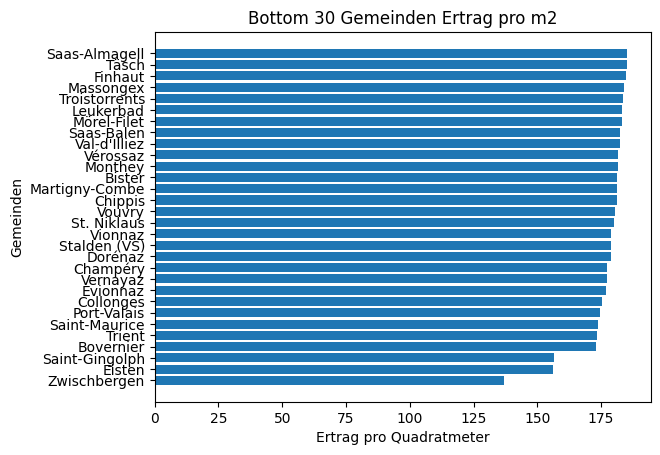

In [24]:
# Visualisierung der 30 Gemeinden mit den schlechtesten Ertrag pro m2
import matplotlib.pyplot as plt

bottom30 = df_ertrag.nsmallest(30, 'Ertrag_pro_Quadratmeter')

# Balkendiagramm erstellen mit matplotlib
plt.barh(bottom30['GGDENAME'], bottom30['Ertrag_pro_Quadratmeter'])
plt.xlabel('Ertrag pro Quadratmeter')
plt.ylabel('Gemeinden')
plt.title('Bottom 30 Gemeinden Ertrag pro m2')
plt.show()


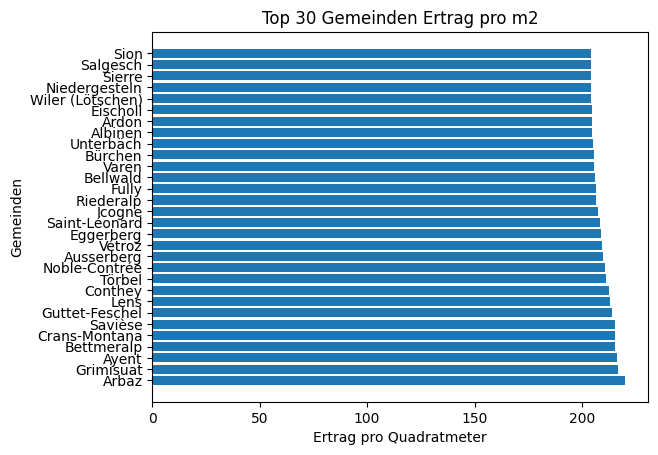

In [25]:
# Top 30 Gemeinden visualisieren 

top30 = df_ertrag.nlargest(30, 'Ertrag_pro_Quadratmeter')

# Balkendiagramm erstellen
plt.barh(top30['GGDENAME'], top30['Ertrag_pro_Quadratmeter'])
plt.xlabel('Ertrag pro Quadratmeter')
plt.ylabel('Gemeinden')
plt.title('Top 30 Gemeinden Ertrag pro m2')
plt.show()


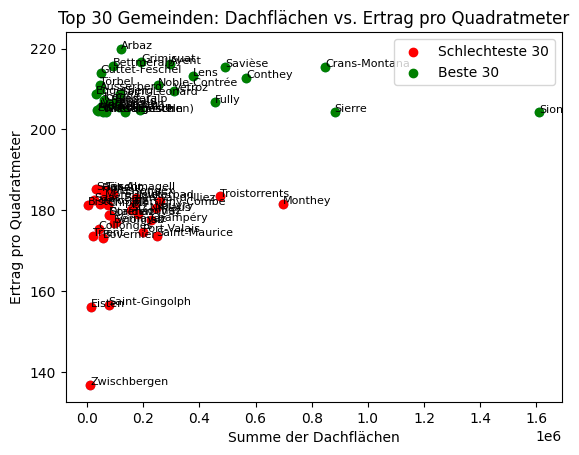

In [26]:
# Visualisierung der Bottom und Top 30 zum Vergleich, Top in grün, Bottom in rot

df_scatter = pd.concat([top30, bottom30])
plt.scatter(df_scatter['Summe_Flaeche'], df_scatter['Ertrag_pro_Quadratmeter'], alpha=0.7)

for i, row in df_scatter.iterrows():
    plt.text(row['Summe_Flaeche'], row['Ertrag_pro_Quadratmeter'], row['GGDENAME'], fontsize=8)


plt.scatter(bottom30['Summe_Flaeche'], bottom30['Ertrag_pro_Quadratmeter'], color='red', label='Bottom 30')

plt.scatter(top30['Summe_Flaeche'], top30['Ertrag_pro_Quadratmeter'], color='green', label='Top 30')

plt.xlabel('Summe der Dachflächen')
plt.ylabel('Ertrag pro Quadratmeter')
plt.title('Top 30 Gemeinden: Dachflächen vs. Ertrag pro Quadratmeter')

plt.legend()

plt.show()
